In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('./Data/Static/big_c_conversations.jsonl', lines=True)

# 1. Basic Data Overview
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nData types:")
print(df.dtypes)
print("\nNull values:")
print(df.isnull().sum())

Dataset shape: (19011, 4)

Columns: Index(['bemba_sentences', 'english_sentences', 'id', 'img_path'], dtype='object')

Data types:
bemba_sentences      object
english_sentences    object
id                    int64
img_path             object
dtype: object

Null values:
bemba_sentences      0
english_sentences    0
id                   0
img_path             0
dtype: int64


In [3]:
# 2. Sentence Count Analysis
df['bemba_sentence_count'] = df['bemba_sentences'].apply(len)
df['english_sentence_count'] = df['english_sentences'].apply(len)

print("Bemba sentence count statistics:")
print(df['bemba_sentence_count'].describe())
print("\nEnglish sentence count statistics:")
print(df['english_sentence_count'].describe())

Bemba sentence count statistics:
count    19011.0
mean         5.0
std          0.0
min          5.0
25%          5.0
50%          5.0
75%          5.0
max          5.0
Name: bemba_sentence_count, dtype: float64

English sentence count statistics:
count    19011.0
mean         5.0
std          0.0
min          5.0
25%          5.0
50%          5.0
75%          5.0
max          5.0
Name: english_sentence_count, dtype: float64


Word Count Statistics:
           Mean  Median  Min  Max  Std Dev
Language                                  
Bemba     47.28    45.0   12  172    17.64
English   59.88    57.0   21  197    19.53


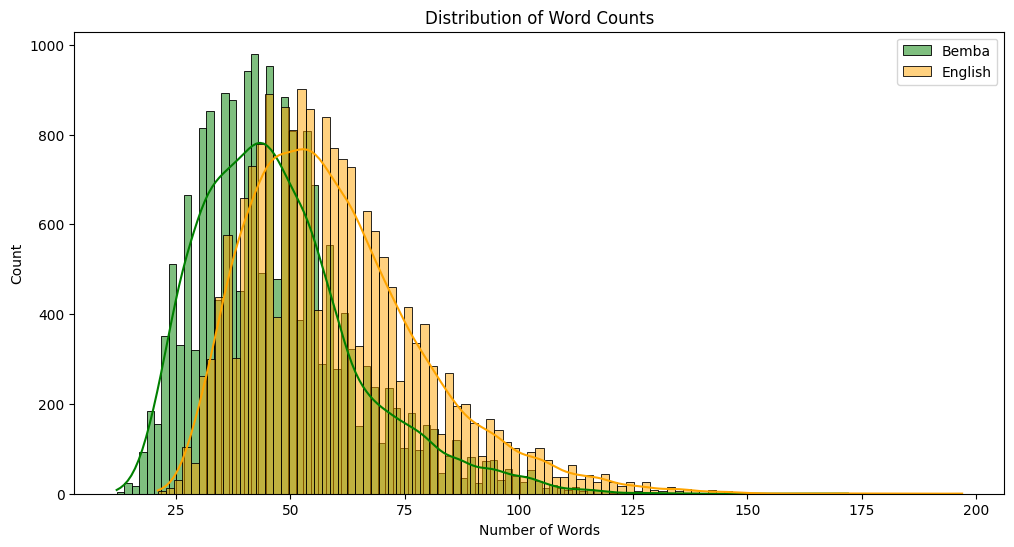

In [4]:
# 3. Word Count Analysis
def count_words(sentences):
    return sum(len(sentence.split()) for sentence in sentences)

df['bemba_word_count'] = df['bemba_sentences'].apply(count_words)
df['english_word_count'] = df['english_sentences'].apply(count_words)

# Create a DataFrame for the statistics
stats_df = pd.DataFrame({
    'Language': ['Bemba', 'English'],
    'Mean': [df['bemba_word_count'].mean(), df['english_word_count'].mean()],
    'Median': [df['bemba_word_count'].median(), df['english_word_count'].median()],
    'Min': [df['bemba_word_count'].min(), df['english_word_count'].min()],
    'Max': [df['bemba_word_count'].max(), df['english_word_count'].max()],
    'Std Dev': [df['bemba_word_count'].std(), df['english_word_count'].std()]
})

# Round all numeric columns to 2 decimal places
stats_df = stats_df.round(2)

# Set 'Language' as the index for better display
stats_df.set_index('Language', inplace=True)

# Display the table
print("Word Count Statistics:")
print(stats_df.to_string())

# Visualize word count distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='bemba_word_count', kde=True, color='green', alpha=0.5, label='Bemba')
sns.histplot(data=df, x='english_word_count', kde=True, color='orange', alpha=0.5, label='English')
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.legend()
plt.show()

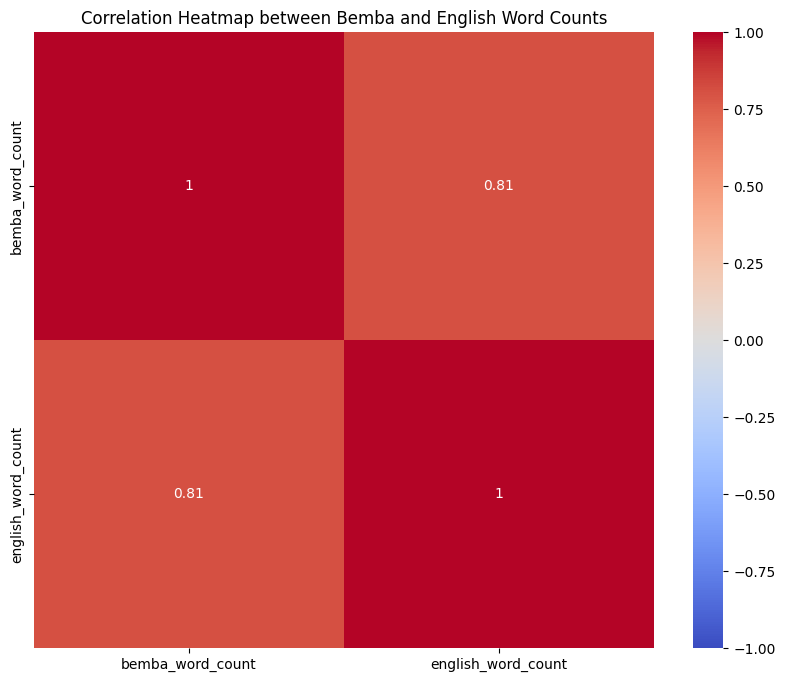

In [5]:
# 4. Correlation between Bemba and English sentence/word counts
correlation_data = df[[ 'bemba_word_count', 'english_word_count']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between Bemba and English Word Counts')
plt.show()

In [6]:
# 5. Sample Data Exploration
def print_sample(df, index):
    print(f"Sample {index}:")
    print("Bemba sentences:")
    for i, sentence in enumerate(df.loc[index, 'bemba_sentences'], 1):
        print(f"  {i}. {sentence}")
    print("\nEnglish sentences:")
    for i, sentence in enumerate(df.loc[index, 'english_sentences'], 1):
        print(f"  {i}. {sentence}")
    print(f"\nImage path: {df.loc[index, 'img_path']}")
    print("-" * 50)

# Print 3 random samples
for _ in range(3):
    print_sample(df, df.sample().index[0])

Sample 15877:
Bemba sentences:
  1. Uyu umwaice alepepeka ifyoni ifikulu ifilemoneka kwati nimbata
  2. uyu umwana umwaume ale butukila palunkoto iyisuma
  3. Mumutwe wakwe umwaice uyu muli umwa beywa pakati yamutwe epa shele fye imishishi
  4. Ifi ifyono ale pepeka uyu umwana tafi pupuka saana.
  5. Uku kuncende uyu umwaice ali, nakufula imiti ishitali isha.

English sentences:
  1. A child is chasing the ducks.
  2. The child is playing on the grass.
  3. The hair of this child is cut.
  4. The child is chasing things that do not fly.
  5. The child is at a place with a lot of trees.

Image path: 3486324591.jpg
--------------------------------------------------
Sample 3145:
Bemba sentences:
  1. Namaayo naikata icili kwati ninkulungo pa mukoshi.
  2. Natambulula ukuboko kwaku kuso kabili nafunga.
  3. Pa menso ali nga uwimishe icafina.
  4. Kanshi nalimo alefwaya ukuposa ico ekete ku minwe.
  5. Kabili afwele afwele akaku muulu akepi nakasha umutoto panse.

English sentences:
  1. A 